<a href="https://colab.research.google.com/github/AkratiSachan23/PyTorch-for-Deep-Learning-Machine-Learning/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("PyTorch")

PyTorch


In [ ]:
!nvidia-smi

Mon Mar  3 17:30:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu124


## Introduction to Tensors

In [ ]:
TENSOR=torch.tensor([[[1,2,3],
                      [4,5,6],
                      [7,8,9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

### Create random tensor

In [ ]:
random_tensor= torch.rand(3,4)
random_tensor


tensor([[0.7040, 0.8037, 0.4977, 0.4270],
        [0.1971, 0.7159, 0.3317, 0.1120],
        [0.2450, 0.3183, 0.2413, 0.7967]])

In [ ]:
random_tensor.shape,random_tensor.ndim

(torch.Size([3, 4]), 2)

In [ ]:
random_tensor.dtype

torch.float32

In [ ]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(start=0, end=100,step=9)

tensor([ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99])

In [ ]:
# MUltiplication
TENSOR=torch.tensor([7,8,9])
TENSOR

tensor([7, 8, 9])

In [ ]:
print(f"Multiply: {TENSOR*TENSOR}")

Multiply: tensor([49, 64, 81])


In [ ]:
torch.matmul(TENSOR,TENSOR) #Matrix multiplications

tensor(194)

One of the most common error in Deep Learning : Shape Errors

In [ ]:
tensor_A=torch.tensor([[1,2],
                       [3,4],
                       [5,6]])
tensor_B=torch.tensor([[7,10],
                       [8,11],
                       [9,12]])
torch.matmul(tensor_A,tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_B.shape,tensor_A.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
tensor_B.T,tensor_B

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]))

In [ ]:
torch.mm(tensor_A,tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

***Running tensors and Pytoch objects on the GPUs(and making faster computations***

In [ ]:
!nvidia-smi

Sat Mar  8 13:23:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Check for GPU access with Pytorch
torch.cuda.is_available()


True

In [ ]:
# Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#count number of devices
torch.cuda.device_count()

1

In [ ]:
# Putting tensors() on GPU
tensor=torch.tensor([1,2,3], device="cpu")
print(tensor,tensor.device)


tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU
tensor_on_GPU=tensor.to(device)
tensor_on_GPU

tensor([1, 2, 3], device='cuda:0')

In [ ]:
tensor_back_on_cpu=tensor_on_GPU.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

# **Pytorch Workflow Module**

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


## Data preparing and loading


In [ ]:
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([0.4400]))

In [ ]:
len(X),len(y)

(50, 50)

## **Splitting data into training ad testing**
#### Course material(training set)-> practice exam(validation set)->final exam(test set)

In [ ]:
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
# we can also use scikit learn train test split
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
# Build a function to visualize our data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14});


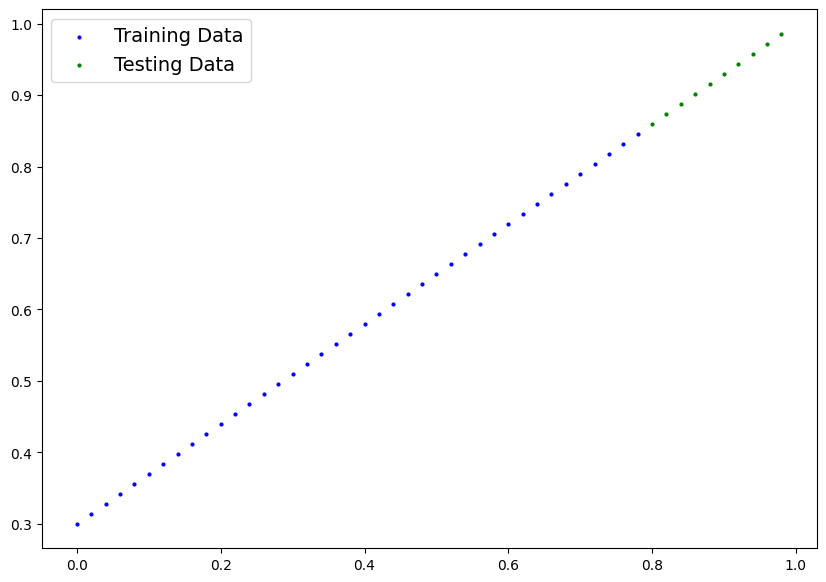

In [ ]:
plot_predictions();

## Build a Pytorch model for Linear Regression

In [ ]:
# Almost everything in Pytorch inherits from nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights =nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias =nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias # LR formulae

In [ ]:
#create a random seed
torch.manual_seed(42)
#create a instance of the model(subclass of nn.Module)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Makeing prediction using torch.inference_mode()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

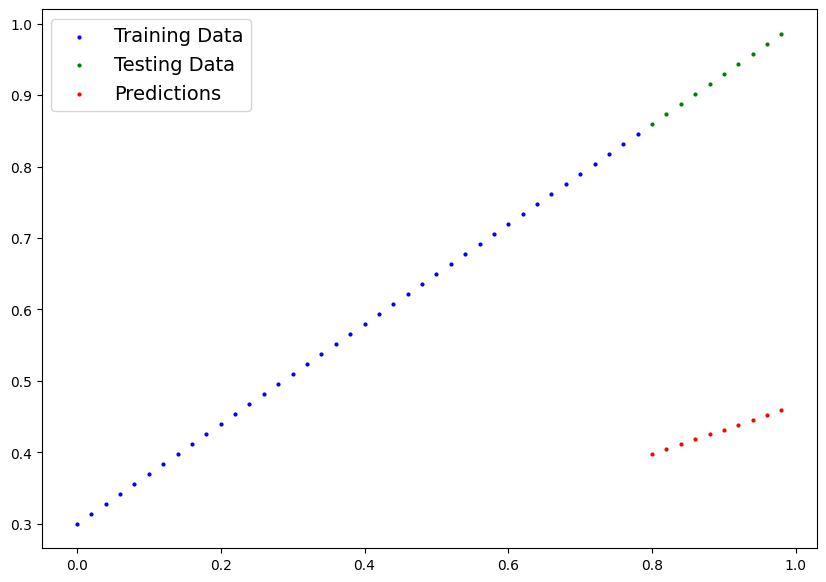

In [ ]:
plot_predictions(predictions=y_preds)

# Train Model-Loss function, Optimizer


In [ ]:
# for regression problem(like our), loss function nn.L1Loss() and an optimizer like torch.optim.SGD()
# for classification problem like classifying whethe a photo is of a dog or a cat, you'll likely want to use loss function of nn.BCELoss() -> binary coss entropy loss
loss_fn=nn.L1Loss()
# setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01) # lr= learning rate = possibly the most important you can set


In [ ]:
# Building a training loop ( and a testing loop) in Pytorch
epochs=200 #epoch is one loop through the data

# Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
# loop through data
for epoch in range(epochs):

  model_0.train() #train mode in Pytorch set all parameters that require gradients to require gradients

  # forward pass on train data using the forward() method inside
  y_preds=model_0(X_train)

  # calculate the loss
  loss=loss_fn(y_preds,y_train)
  print(f"Loss: {loss}")
  # optimizer zero grad
  optimizer.zero_grad()

  #loss backward: perfom backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # step the optimizer(perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # tuns off gradient tracking : turns off different settings in the model not needed for evaluation/testing (dropout/ batch norm layers).

  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch%10==0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch:0 | Loss:0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch:10 | Loss:0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch:20 | Loss:0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0.07638

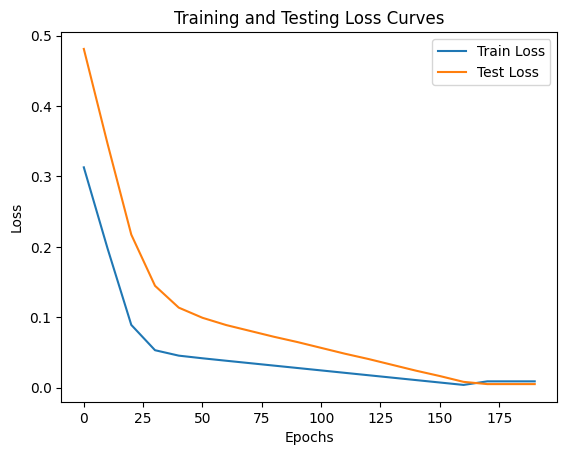

In [ ]:
# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend() # output: Decline loss curve and not much distance between both curves

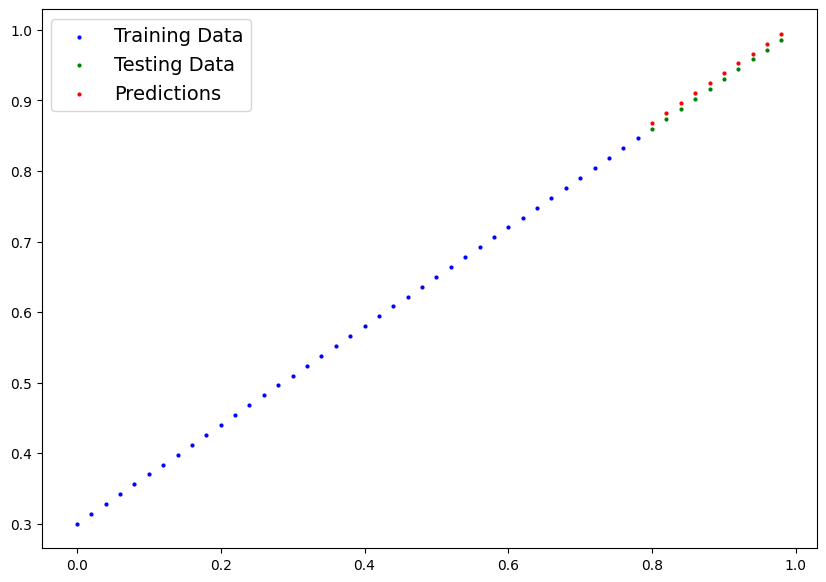

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
plot_predictions(predictions=y_preds_new)

## Saving a model


In [ ]:
# torch.save() - allows you to save a Pytoch object in Pythons pickle format
# torch.load() - allows you to load a saved Pytorch object
# torch.nn.Module.load_state_dict() - allows you to load a models saved state dictionary

from pathlib import Path
# Create model directory
Model_Path=Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)
# create model save path
Model_Name="01_pytorch_workflow_model_0.pth"
Model_save_Path=Model_Path/Model_Name
# Save the model state_dict
print(f"Saving model to: {Model_save_Path}")

torch.save(obj=model_0.state_dict(),
           f=Model_save_Path)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 12 20:07 01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()
# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=Model_save_Path))


<ipython-input-20-4905093b039a>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=Model_save_Path))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])